In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns

In [3]:
house_data = pd.read_csv('Datasets/kc_house_data_processed.csv')

house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [4]:
target = house_data['price']
features = house_data.drop(['price'], axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2)

In [8]:
X_train.shape, y_train.shape

((17290, 15), (17290,))

In [9]:
X_test.shape, y_test.shape

((4323, 15), (4323,))

15

In [28]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
def adjusted_r2(r_square, labels, features):
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    return adj_r_square

In [33]:
def build_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('Training R2:{}'.format(model.score(X_train, y_train)))
    print()
    test_r2_score = r2_score(y_test, y_pred)
    print('Testing R2:{}'.format(test_r2_score))
    print('Testing adjusted R2:{}'.format(adjusted_r2(test_r2_score, y_test, X_test)))
    
    print()
    print('Mean square error: {}'.format(mean_squared_error(y_test, y_pred)))
    print('Root mean square error: {}'.format(sqrt(mean_squared_error(y_test, y_pred))))
    print('Mean Absolute error: {}'.format(mean_absolute_error(y_test, y_pred) ))
    
    return y_pred

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
linear_regression = LinearRegression()
y_pred = build_and_evaluate_model(linear_regression, X_train, y_train, X_test, y_test)

Training R2:0.6558366184699296

Testing R2:0.6466665849762138
Testing adjusted R2:0.6454360297810996

Mean square error: 48911147429.689224
Root mean square error: 221158.6476484454
Mean Absolute error: 141411.20317540944


In [36]:
df = pd.DataFrame({'Test': y_test, 'Predicted': y_pred})
df.sample(10)

,Test,Predicted
12900,302200.0,3.288664e+05
10245,355000.0,2.904171e+05
11293,559500.0,4.234271e+05
19338,628990.0,6.774090e+05
20787,483453.0,5.540980e+05
5687,248000.0,1.255928e+05
11755,250000.0,2.902335e+05
18653,465000.0,5.045390e+05
4743,1490000.0,1.234142e+06
10616,472000.0,8.774078e+05


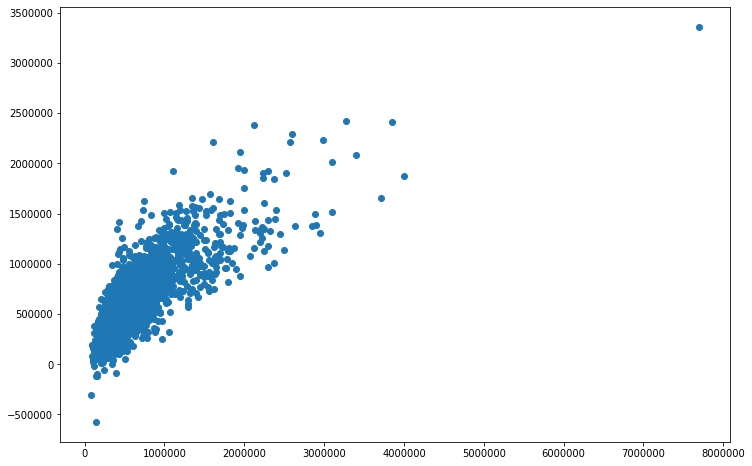

In [37]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test.values, y_pred)